# 作業三

## 有一個知名網站的使用者log 檔 web.txt
- https://github.com/ywchiu/twmpython/raw/master/web.txt

撰寫一個函式 getUserViewProfile(uid), 當輸入使用者id 時，可回傳字典：
- 使用者瀏覽過的商品(list) viewproduct
- 使用者瀏覽過的商品數 viewproductnum


In [9]:
import re
product_list = []
with open('web.txt', 'r') as f:
    for l in f.readlines():
        m = re.search('uid=(.*?);pid=(.*?);', l.strip())
        if m: 
            user = m.group(1)
            product = m.group(2)
            if user == 'U129297265':
                product_list.append(product)
        #print l.strip()
        #break
print product_list

['0023468384']


In [10]:
import re
def getUserViewProfile(uid):
    product_list = []
    with open('web.txt', 'r') as f:
        for l in f.readlines():
            m = re.search('uid=(.*?);pid=(.*?);', l.strip())
            if m: 
                user = m.group(1)
                product = m.group(2)
                if user == uid:
                    product_list.append(product)
    return {'viewproduct':product_list, 'viewproductnum':len(product_list)}

getUserViewProfile('U129297265')

{'viewproduct': ['0023468384'], 'viewproductnum': 1}

In [12]:
from datetime import datetime
print datetime.now()
print type(datetime.now())

2016-06-15 14:49:05.338000
<type 'datetime.datetime'>


In [14]:
# convert from time to string
print datetime.now().strftime('%Y/%m/%d')
dt = datetime.now().strftime('%Y/%m/%d')
print type(dt)

2016/06/15
<type 'str'>


In [16]:
#convert from string to time
print datetime.strptime(dt, '%Y/%m/%d')

2016-06-15 00:00:00


In [19]:
from datetime import datetime, timedelta
print datetime.now()
print datetime.now() - timedelta(days = 1)
print datetime.now() - timedelta(days = 2)

2016-06-15 14:53:31.493000
2016-06-14 14:53:31.494000
2016-06-13 14:53:31.494000


In [22]:
from datetime import datetime, timedelta
for i in range(1,101): 
    #print datetime.now() - timedelta(days = i)
    print (datetime.now() - timedelta(days = i)).strftime('%Y/%m/%d')

2016/06/14
2016/06/13
2016/06/12
2016/06/11
2016/06/10
2016/06/09
2016/06/08
2016/06/07
2016/06/06
2016/06/05
2016/06/04
2016/06/03
2016/06/02
2016/06/01
2016/05/31
2016/05/30
2016/05/29
2016/05/28
2016/05/27
2016/05/26
2016/05/25
2016/05/24
2016/05/23
2016/05/22
2016/05/21
2016/05/20
2016/05/19
2016/05/18
2016/05/17
2016/05/16
2016/05/15
2016/05/14
2016/05/13
2016/05/12
2016/05/11
2016/05/10
2016/05/09
2016/05/08
2016/05/07
2016/05/06
2016/05/05
2016/05/04
2016/05/03
2016/05/02
2016/05/01
2016/04/30
2016/04/29
2016/04/28
2016/04/27
2016/04/26
2016/04/25
2016/04/24
2016/04/23
2016/04/22
2016/04/21
2016/04/20
2016/04/19
2016/04/18
2016/04/17
2016/04/16
2016/04/15
2016/04/14
2016/04/13
2016/04/12
2016/04/11
2016/04/10
2016/04/09
2016/04/08
2016/04/07
2016/04/06
2016/04/05
2016/04/04
2016/04/03
2016/04/02
2016/04/01
2016/03/31
2016/03/30
2016/03/29
2016/03/28
2016/03/27
2016/03/26
2016/03/25
2016/03/24
2016/03/23
2016/03/22
2016/03/21
2016/03/20
2016/03/19
2016/03/18
2016/03/17
2016/03/16

In [30]:
import re
product_list = []
with open('web.txt', 'r') as f:
    for l in f.readlines():
        m = re.search('\[(.*?)\].*?uid=(.*?);', l.strip())
        if m and m.group(2) != '' : 
            #print m.group(1), m.group(2)
            dt = datetime.strptime((m.group(1)).split()[0], \
                                   '%d/%b/%Y:%H:%M:%S')
            uid = m.group(2)
            if uid == 'U10120096721':
                print dt, uid

2015-02-01 00:04:28 U10120096721
2015-02-01 00:04:46 U10120096721
2015-02-01 00:06:14 U10120096721


In [43]:
from datetime import datetime
import time
#fromtimestamp(datetime.strptime('2016-01-01', '%Y-%m-%d'))


print time.mktime(datetime.strptime('2016-01-01', "%Y-%m-%d").timetuple())

1451577600.0


In [44]:
import re
product_list = []
dic = {}
with open('web.txt', 'r') as f:
    for l in f.readlines():
        m = re.search('\[(.*?)\].*?uid=(.*?);', l.strip())
        if m and m.group(2) != '' : 
            #print m.group(1), m.group(2)
            dt = datetime.strptime((m.group(1)).split()[0], \
                                   '%d/%b/%Y:%H:%M:%S')
            dt2 = time.mktime(dt.timetuple())
            uid = m.group(2)
            if uid not in dic:
                dic[uid] = [dt2]
            else:
                dic[uid].append(dt2)

In [48]:
import numpy as np
totalelapsed = [] 
for user in dic:
    n = np.array(dic[user])
    totalelapsed.extend(np.diff(n))
#print totalelapsed

[1735.0, 118.0, 7.0, 546.0, 126.0, 111.0, 823.0, 65.0, 124.0, 9.0, 26.0, 16.0, 7.0, 59.0, 74.0, 15.0, 20.0, 104.0, 284.0, 205.0, 107.0, 60.0, 8.0, 43.0, 69.0, 38.0, 10.0, 21.0, 64.0, 165.0, 4.0, 11.0, 5.0, 10.0, 6.0, 10.0, 6.0, 6.0, 109.0, 9.0, 25.0, 12.0, 158.0, 6.0, 1320.0, 124.0, 55.0, 81.0, 223.0, 88.0, 76.0, 43.0, 154.0, 25.0, 25.0, 45.0, 3.0, 142.0, 5.0, 8.0, 12.0, 7.0, 15.0, 80.0, 165.0, 195.0, 24.0, 25.0, 14.0, 52.0, 12.0, 15.0, 25.0, 137.0, 37.0, 21.0, 20.0, 4.0, 15.0, 25.0, 48.0, 156.0, 45.0, 12.0, 92.0, 32.0, 15.0, 11.0, 19.0, 32.0, 14.0, 22.0, 27.0, 14.0, 80.0, 2.0, 8.0, 4.0, 28.0, 29.0, 19.0, 18.0, 10.0, 17.0, 20.0, 467.0, 22.0, 14.0, 93.0, 13.0, 88.0, 47.0, 285.0, 139.0, 229.0, 30.0, 23.0, 93.0, 54.0, 18.0, 8.0, 107.0, 23.0, 7.0, 22.0, 4.0, 52.0, 77.0, 96.0, 10.0, 10.0, 166.0, 11.0, 57.0, 7.0, 32.0, 26.0, 22.0, 14.0, 317.0, 90.0, 124.0, 29.0, 91.0, 20.0, 123.0, 41.0, 27.0, 21.0, 13.0, 16.0, 40.0, 11.0, 110.0, 74.0, 33.0, 494.0, 112.0, 168.0, 29.0, 21.0, 32.0, 211.0, 29.0,

In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [50]:
import pandas as pd
df = pd.DataFrame(totalelapsed)

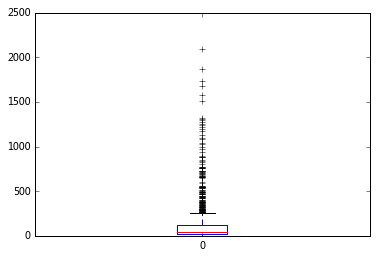

In [54]:
#?df.plot
df.plot(kind='box', y=0)